## Tarea 1 del curso CM-072

* Nombre y apellidos: Bitzer Nazaret Arotoma Bacilio
* Fecha de presentación: 11 de setiembre.

## Lista de preguntas:

1 . Responde de acuerdo a los conceptos hechos en clase las siguientes preguntas:
   * Supongamos que tenemos la tarea de construir un sistema que pueda distinguir  correo no deseado o spam. ¿Qué crees que hay en un correo electrónico no deseado que nos permite saber que es spam? ¿Cómo puede la computadora detectar spam a través de un análisis sintáctico?. ¿Qué te gustaría que hiciera la computadora si detecta un correo electrónico que es spam?, ¿eliminarlo automáticamente, moverlo a un archivo diferente o simplemente resaltarlo en la pantalla?.
   
   * ¿Cómo se puede predecir el siguiente comando a ser escrito por un usuario? ¿O la próxima página de la que descargará información en la Web? ¿Cuándo sería útil tal predicción? ¿Cuándo no?.

##### Respuesta 1:
    
  * Este es un problema fundamentalmente de clasificación, la cual tiene como caracteristica generar un regla general que correlacione los datos de observación. En un correo electronico no deseado se pueden distinguir patrones inusuales como son los caracteres especiales (%&#..), textos en mayúscula, numeros similares a telefonos o cuentas bancarias. 
  * 

2 . ¿Puedes predecir las especies de un iris usando medidas de pétalos y sépalos?

   * Lee los datos del conjunto predeterminado `iris` en un DataFrame de Pandas, incluyendo los nombres de las columnas.
   * Recolecta  información básica sobre los datos `iris`  utilizando pandas.
   * Utiliza la clasificación, [dividir-aplicar-combinar](https://pandas.pydata.org/pandas-docs/version/0.23.4/groupby.html) y  visualización para buscar las diferencias entre las especies.

   * Escribe un conjunto de reglas que podrían usarse para predecir especies en base a las mediciones de iris.
   * Define una función que acepte una fila de datos y devuelva una especie pronosticada. Luego, usa esa función para hacer predicciones para todas las filas de datos existentes y verifique la precisión de sus predicciones.


In [1]:
#Leer datos en un DataFrame de Pandas
from sklearn import datasets
iris = datasets.load_iris()
import pandas as pd
data = pd.DataFrame(iris.data, columns= iris.feature_names)
data['target'] = iris.target
data.target.replace( [0, 1, 2], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],inplace=True)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#Informacion de la data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
#Clasificación dividir-aplicar-combinar
pd.set_option('display.max_columns', 500)
#split
data_groups = data.groupby('target')
#Apply
data_groups.describe()

petal length (cm)                                          \
                            count   mean       std  min  25%   50%    75%   
target                                                                      
Iris-setosa                  50.0  1.464  0.173511  1.0  1.4  1.50  1.575   
Iris-versicolor              50.0  4.260  0.469911  3.0  4.0  4.35  4.600   
Iris-virginica               50.0  5.552  0.551895  4.5  5.1  5.55  5.875   

                     petal width (cm)                                       \
                 max            count   mean       std  min  25%  50%  75%   
target                                                                       
Iris-setosa      1.9             50.0  0.244  0.107210  0.1  0.2  0.2  0.3   
Iris-versicolor  5.1             50.0  1.326  0.197753  1.0  1.2  1.3  1.5   
Iris-virginica   6.9             50.0  2.026  0.274650  1.4  1.8  2.0  2.3   

                     sepal length (cm)                                         \
                 max             count   mean       std  min    25%  50%  75%   
target                                                                          
Iris-setosa      0.6              50.0  5.006  0.352490  4.3  4.800  5.0  5.2   
Iris-versicolor  1.8              50.0  5.936  0.516171  4.9  5.600  5.9  6.3   
Iris-virginica   2.5              50.0  6.588  0.635880  4.9  6.225  6.5  6.9   

                     sepal width (cm)                                    \
                 max            count   mean       std  min    25%  50%   
target                                                                    
Iris-setosa      5.8             50.0  3.418  0.381024  2.3  3.125  3.4   
Iris-versicolor  7.0             50.0  2.770  0.313798  2.0  2.525  2.8   
Iris-virginica   7.9             50.0  2.974  0.322497  2.2  2.800  3.0   

                             
                   75%  max  
target                       
Iris-setosa      3.675  4.4  
Iris-versicolor  3.000  3.4  
Iris-virginica   3.175  3.8

In [6]:
data_mean = data_groups.mean().reset_index()
data_mean.columns = ["Mean of " + data_mean.columns[i] for i in range(len(data_mean.columns))]
data_mean

,Mean of target,Mean of sepal length (cm),Mean of sepal width (cm),Mean of petal length (cm),Mean of petal width (cm)
0,Iris-setosa,5.006,3.418,1.464,0.244
1,Iris-versicolor,5.936,2.770,4.260,1.326
2,Iris-virginica,6.588,2.974,5.552,2.026


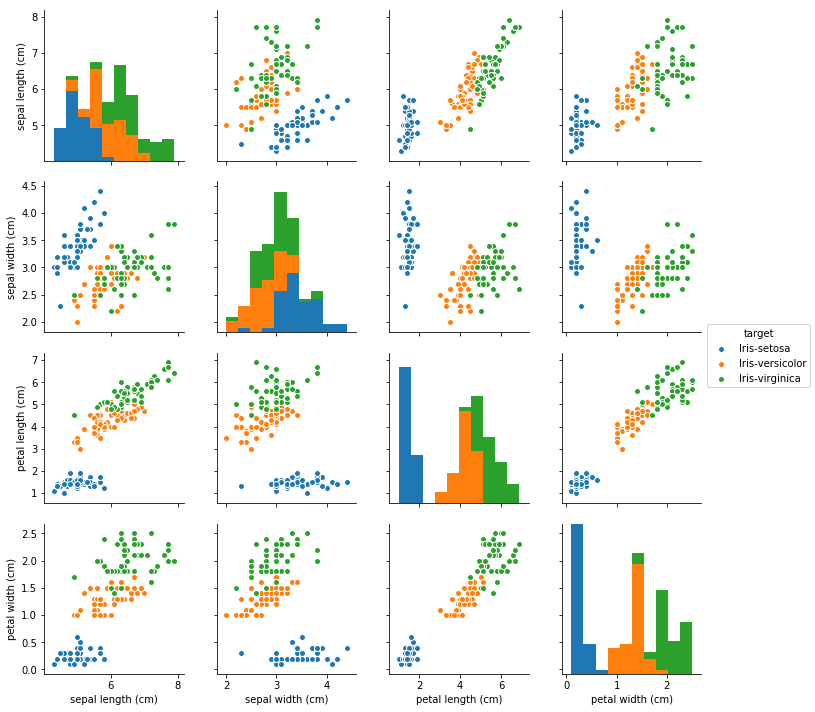

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(data, hue='target');

3 . Sea el siguiente código de generación de datos:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

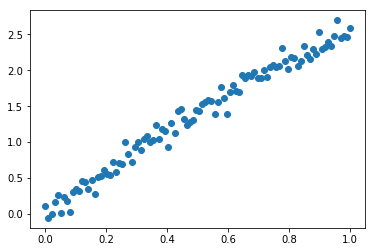

In [9]:
# Recolectamos datos artificiales
n = 100
x = np.linspace(0, 1, n)
y = np.sin(x)*3 + np.random.normal(0, 0.1, n)
plt.plot(x, y, 'o');

Usando los siguientes datos y scikit learn, desarrolla los siguientes pasos descritos en clase, para una regresión lineal:

* Escoger un modelo
* Elegir modelo de hiperparámetros
* Organiza los datos en una matriz de características y vector objetivo.
* Fija el modelo a tus datos.
* Predecir etiquetas para datos desconocidos.

In [13]:
y

array([ 0.10757682, -0.05267555, -0.00433549,  0.1728806 ,  0.266141  ,
        0.01176406,  0.23337217,  0.18193141,  0.03561506,  0.31291504,
        0.35464728,  0.32502898,  0.46486567,  0.44768851,  0.35476264,
        0.47979563,  0.28092353,  0.51366257,  0.5347518 ,  0.61141082,
        0.55274857,  0.54868367,  0.71898882,  0.58413122,  0.71413535,
        0.69860104,  0.99594764,  0.83570699,  0.72950576,  0.92767223,
        0.99642863,  0.89429172,  1.04485841,  1.09138844,  1.00562029,
        1.02539403,  1.23587733,  1.04513697,  1.18743779,  1.15961894,
        0.92935354,  1.26147516,  1.1221341 ,  1.42673948,  1.46592252,
        1.31516084,  1.24461336,  1.27656986,  1.30455642,  1.44775613,
        1.42638802,  1.53248728,  1.55631516,  1.58669603,  1.56585197,
        1.38882077,  1.56158532,  1.76113843,  1.61125567,  1.39569791,
        1.70314306,  1.79726218,  1.70543202,  1.69934647,  1.93644994,
        1.89109555,  1.92717843,  1.92199653,  1.97133585,  1.89

In [17]:
# Tu respuestaimport numpy as np
def loss(v):
    e = 0.0
    for i in range(len(X)):
        e += np.square(v[0] + v[1]*X[i] - Y[i])
    return 0.5 * e
def gradient(v):
    g = np.zeros(shape=2)
    for i in range(len(X)):
        g[0] += (v[0] + v[1]*X[i] - Y[i])
        g[1] += ((v[0] + v[1]*X[i] - Y[i]) * X[i])
    return g

from scipy.optimize import minimize
minimize(fun=loss(x), x0=[0.0, 0.0], jac=gradient, method='L-BFGS-B')

NameError: name 'X' is not defined

4 . Realiza los mismos pasos para el conjunto  de datos de scikit learn  [load_diabetes](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html). 

In [6]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [7]:
data.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

In [8]:
print(data['DESCR'])

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [9]:
X = data['data']
y = data['target']
X.shape, y.shape

((442, 10), (442,))

In [10]:
# Tu solucion

5 (Obligatoria). Lee el siguiente artículo [Understanding the Bias-Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html), responde las siguientes preguntas:

* En el ejemplo Party Registration, ¿cuáles son las características? ¿Cuál es la respuesta? ¿Es  un problema de regresión o clasificación?.

* Conceptualmente, ¿cómo se aplica KNN a este problema para hacer una predicción?
* ¿Cómo se relacionan las cuatro visualizaciones en la sección 3 entre sí?. Cambia el valor de **k** utilizando el control deslizante y explica por que  cambió  las visualizaciones.
* En las figuras 4 y 5, ¿qué significan los colores más claros en comparación con los colores más oscuros? ¿Cómo se calcula la oscuridad?

* ¿Qué representa la línea negra en la figura 5? ¿Qué predicciones haría el mejor modelo de aprendizaje automático con respecto a esta línea?

* Elije un valor pequeño para `k` y haz clic en el botón `Generate New Training Data` varias veces. ¿Observas "baja varianza o alta varianza, bajo sesgo o alto sesgo?

* Repite este procedimiento con un valor muy grande de `k`. ¿Observas "baja varianza o alta varianza, bajo sesgo o alto sesgo?.

* Utiliza otros valores de `k`. ¿Qué valor crees que es "mejor"? ¿Cómo defines "mejor"?.

* ¿Un pequeño valor de `k` produce "overfitting" o "underfitting"? y ¿por qué?.

* ¿Por qué debería importarnos la varianza? ¿No deberíamos minimizar el sesgo e ignorar la varianza?.

In [11]:
# Tu solucion